# Lead Scoring Case Study

##### X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading and Analyzing Data

In [18]:
#Let's read the dataset first
dat = pd.read_csv("Leads.csv")
dat.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [19]:
dat.shape

(9240, 37)

In [20]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [21]:
print(dat['Receive More Updates About Our Courses'].value_counts())
print(dat['Update me on Supply Chain Content'].value_counts())
print(dat['I agree to pay the amount through cheque'].value_counts())
print(dat['Get updates on DM Content'].value_counts())

No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64


In [22]:
## Dropping the columns with no variation in values
dat1 = dat.drop(['Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'I agree to pay the amount through cheque',
                 'Get updates on DM Content'],axis = 1)

In [23]:
##Formatting column headers

dat1.columns = dat1.columns.str.strip()
dat1.columns = dat1.columns.str.replace(' ', '_')
dat1 = dat1.replace('Select', np.nan)

In [24]:
#Analyzing the Null values
pct_null = ((dat1.isnull().sum() / len(dat1))*100).round(2)
pct_null[pct_null > 0]

Lead_Source                                       0.39
TotalVisits                                       1.48
Page_Views_Per_Visit                              1.48
Last_Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How_did_you_hear_about_X_Education               78.46
What_is_your_current_occupation                  29.11
What_matters_most_to_you_in_choosing_a_course    29.32
Tags                                             36.29
Lead_Quality                                     51.59
Lead_Profile                                     74.19
City                                             39.71
Asymmetrique_Activity_Index                      45.65
Asymmetrique_Profile_Index                       45.65
Asymmetrique_Activity_Score                      45.65
Asymmetrique_Profile_Score                       45.65
dtype: float64

In [25]:
##replacing null values 

dat1['TotalVisits'].fillna((round(dat1['TotalVisits'].mean())), inplace=True)
dat1.dropna(subset=['Lead_Source'], inplace = True)
dat1['Page_Views_Per_Visit'] = dat1['Page_Views_Per_Visit'].replace(np.nan,0)
dat1.dropna(subset=['Last_Activity'], inplace = True)
dat1['What_is_your_current_occupation'] = dat1['What_is_your_current_occupation'].replace(np.nan, 'Other')
dat1['How_did_you_hear_about_X_Education'] = dat1['How_did_you_hear_about_X_Education'].replace(np.nan, 'Other')
dat1['What_matters_most_to_you_in_choosing_a_course'] = dat1['What_matters_most_to_you_in_choosing_a_course'].replace(np.nan, 'Other')
dat1['Lead_Quality'] = dat1['Lead_Quality'].replace(np.nan, 'Not Sure')
dat1['Lead_Profile'] = dat1['Lead_Profile'].replace(np.nan, 'Other Leads')
dat1['Specialization'] = dat1['Specialization'].replace(np.nan, 'Other Specialization')
dat1['Tags'] = dat1['Tags'].replace(np.nan, 'Other Tags')
dat1 = dat1.drop(['City','Asymmetrique_Activity_Index','Asymmetrique_Profile_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score'], axis = 1)

In [27]:
#!pip install sklearn-pandas

###for imputing categorical data 
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
dat1['Country'] = imputer.fit_transform(dat1['Country'])

In [28]:
pct_null = ((dat1.isnull().sum() / len(dat1))*100).round(2)
pct_null[pct_null > 0]

Series([], dtype: float64)

In [29]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
Prospect_ID                                      9103 non-null object
Lead_Number                                      9103 non-null int64
Lead_Origin                                      9103 non-null object
Lead_Source                                      9103 non-null object
Do_Not_Email                                     9103 non-null object
Do_Not_Call                                      9103 non-null object
Converted                                        9103 non-null int64
TotalVisits                                      9103 non-null float64
Total_Time_Spent_on_Website                      9103 non-null int64
Page_Views_Per_Visit                             9103 non-null float64
Last_Activity                                    9103 non-null object
Country                                          9103 non-null object
Specialization                                   9103 

## Data Preparation 

In [30]:
# Converting columns with binary variables (Yes/No) to (0/1)

# List of columns to map
varlist =  ['Do_Not_Email','Do_Not_Call','Search','Magazine','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement','Through_Recommendations','A_free_copy_of_Mastering_The_Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
dat1[varlist] = dat1[varlist].apply(binary_map)

In [31]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 28 columns):
Prospect_ID                                      9103 non-null object
Lead_Number                                      9103 non-null int64
Lead_Origin                                      9103 non-null object
Lead_Source                                      9103 non-null object
Do_Not_Email                                     9103 non-null int64
Do_Not_Call                                      9103 non-null int64
Converted                                        9103 non-null int64
TotalVisits                                      9103 non-null float64
Total_Time_Spent_on_Website                      9103 non-null int64
Page_Views_Per_Visit                             9103 non-null float64
Last_Activity                                    9103 non-null object
Country                                          9103 non-null object
Specialization                                   9103 no

In [32]:
varlist =  ['Lead_Origin','Lead_Source','Last_Activity','Country','Specialization','How_did_you_hear_about_X_Education','What_is_your_current_occupation','What_matters_most_to_you_in_choosing_a_course','Tags','Lead_Quality','Lead_Profile','Last_Notable_Activity']

for i in varlist:
    # Creating dummy variables for the columns
    m1 = pd.get_dummies(dat1[i], prefix=i,drop_first=True)
    #Adding the results to the master dataframe
    dat1 = pd.concat([dat1,m1], axis=1)
    
dat1 = dat1.drop(varlist, 1)

In [33]:
dat1 = dat1.drop('Prospect_ID', 1)

In [34]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Columns: 173 entries, Lead_Number to Last_Notable_Activity_View in browser link Clicked
dtypes: float64(2), int64(13), uint8(158)
memory usage: 2.5 MB


In [35]:
dat1.head()

,Lead_Number,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Search,Magazine,Newspaper_Article,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Test-Train Split

In [36]:
# Putting feature variable to X
X = dat1.drop(['Lead_Number','Converted'], axis=1)

X.head()

,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [37]:
# Putting response variable to y
y = dat1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [38]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

X_train[['Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

,Do_Not_Email,Do_Not_Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,...,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
7963,0,0,10.0,2.486792,0.061935,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5521,1,0,7.0,-0.836090,2.097000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1951,0,0,3.0,1.828055,0.288053,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1553,0,0,4.0,1.307999,-0.164183,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,0.0,-0.890832,-1.068657,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
### Checking the conversion Rate
conv = (sum(dat1['Converted'])/len(dat1['Converted'].index))*100
round(conv)

38

#### We have almost 38% churn rate

## Model Building with Feature Selection Using RFE

In [42]:
#Building the first training model without removing any of the features
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [43]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [44]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False,

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', False, 13),
 ('Do_Not_Call', False, 83),
 ('TotalVisits', False, 121),
 ('Total_Time_Spent_on_Website', True, 1),
 ('Page_Views_Per_Visit', False, 120),
 ('Search', False, 67),
 ('Magazine', False, 146),
 ('Newspaper_Article', False, 102),
 ('X_Education_Forums', False, 116),
 ('Newspaper', False, 104),
 ('Digital_Advertisement', False, 68),
 ('Through_Recommendations', False, 113),
 ('A_free_copy_of_Mastering_The_Interview', False, 109),
 ('Lead_Origin_Landing Page Submission', False, 38),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 69),
 ('Lead_Source_Direct Traffic', False, 54),
 ('Lead_Source_Facebook', False, 35),
 ('Lead_Source_Google', False, 55),
 ('Lead_Source_Live Chat', False, 132),
 ('Lead_Source_NC_EDM', False, 18),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 74),
 ('Lead_Source_Pay per Click Ads', False, 149),
 ('Lead_Source_Press_Release', False, 151),
 ('Lead_Source_Reference', False, 73

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['Total_Time_Spent_on_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_SMS Sent',
       'What_matters_most_to_you_in_choosing_a_course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other Tags',
       'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead_Quality_Worst',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

In [47]:
col_not_selected = X_train.columns[~rfe.support_]
col_not_selected

Index(['Do_Not_Email', 'Do_Not_Call', 'TotalVisits', 'Page_Views_Per_Visit',
       'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums',
       'Newspaper', 'Digital_Advertisement',
       ...
       'Last_Notable_Activity_Email Opened',
       'Last_Notable_Activity_Email Received',
       'Last_Notable_Activity_Form Submitted on Website',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Page Visited on Website',
       'Last_Notable_Activity_Resubscribed to emails',
       'Last_Notable_Activity_SMS Sent', 'Last_Notable_Activity_Unreachable',
       'Last_Notable_Activity_Unsubscribed',
       'Last_Notable_Activity_View in browser link Clicked'],
      dtype='object', length=151)

#### Assessing the model with StatsModels

In [48]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1122.2
Date:                Sun, 25 Aug 2019   Deviance:                       2244.4
Time:                        19:59:39   Pearson chi2:                 1.36e+04
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -2.9678      0.220    -13.488      0.000      -3.399      -2.537
Total_Time_Spent_on_Website                                1.0623      0.064     16.560      0.000       0.937       1.188
Lead_Origin_Lead Add Form                                  1.0680      0.377      2.830      0.005       0.328       1.808
Lead_Source_Olark Chat                                     1.1306      0.160      7.049      0.000       0.816       1.445
Lead_Source_Welingak Website                               3.1036      1.085      2.861      0.004       0.977       5.230
Last_Activity_SMS Sent                                     2.0808      0.129     16.182      0.000       1.829       2.333
What_matters_most_to_you_in_choosing_a_course_Other       -2.5545      0.157    -16.304      0.000      -2.862      -2.247
Tags_Busy                                                  2.1493      0.303      7.089      0.000       1.555       2.744
Tags_Closed by Horizzon                                    8.8967      1.046      8.503      0.000       6.846      10.947
Tags_Lost to EINS                                          9.2048      0.794     11.589      0.000       7.648      10.762
Tags_Other Tags                                            3.1263      0.246     12.694      0.000       2.644       3.609
Tags_Ringing                                              -1.9962      0.306     -6.523      0.000      -2.596      -1.396
Tags_Want to take admission but has financial problems     3.3007      1.127      2.928      0.003       1.091       5.510
Tags_Will revert after reading the email                   5.7875      0.267     21.674      0.000       5.264       6.311
Tags_invalid number                                       -1.6915      1.081     -1.565      0.118      -3.810       0.427
Tags_number not provided                                 -23.2051   2.76e+04     -0.001      0.999   -5.41e+04    5.41e+04
Tags_switched off                                         -3.0299      0.763     -3.973      0.000      -4.525      -1.535
Tags_wrong number given                                  -22.8008   1.97e+04     -0.001      0.999   -3.86e+04    3.85e+04
Lead_Quality_Worst                                        -2.2669      0.680     -3.336      0.001      -3.599      -0.935
Last_Notable_Activity_Modified                            -1.6104      0.131    -12.295      0.000      -1.867      -1.354
Last_Notable_Activity_Olark Chat Conversation             -1.5593      0.447     -3.486      0.000      -2.436      -0.683
==========================================================================================================================
"""

In [49]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7963    0.997353
5521    0.036116
1951    0.991521
1553    0.985359
9170    0.058217
5097    0.098694
8953    0.976175
308     0.389775
5520    0.161296
1045    0.923830
dtype: float64

In [50]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99735344, 0.0361158 , 0.99152085, 0.98535879, 0.05821654,
       0.09869415, 0.97617524, 0.38977521, 0.16129571, 0.92382975])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [51]:
y_train_pred_final = pd.DataFrame({'conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

,conv,Conv_Prob,Lead_Number
0,1,0.997353,7963
1,0,0.036116,5521
2,1,0.991521,1951
3,1,0.985359,1553
4,0,0.058217,9170


In [52]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,conv,Conv_Prob,Lead_Number,predicted
0,1,0.997353,7963,1
1,0,0.036116,5521,0
2,1,0.991521,1951,1
3,1,0.985359,1553,1
4,0,0.058217,9170,0


In [53]:
from sklearn import metrics

In [54]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.conv, y_train_pred_final.predicted )
print(confusion)

[[3763  158]
 [ 236 2215]]


In [55]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.conv, y_train_pred_final.predicted))

0.9381669805398619


#### Checking VIFs

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Other Tags,5.51
5,What_matters_most_to_you_in_choosing_a_course_...,4.91
1,Lead_Origin_Lead Add Form,1.84
4,Last_Activity_SMS Sent,1.68
12,Tags_Will revert after reading the email,1.67
2,Lead_Source_Olark Chat,1.66
18,Last_Notable_Activity_Modified,1.60
0,Total_Time_Spent_on_Website,1.47
3,Lead_Source_Welingak Website,1.42
7,Tags_Closed by Horizzon,1.24


#### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Tags_Other Tags' has the highest VIF. So let's start by dropping that.

In [58]:
col = col.drop('Tags_Other Tags', 1)
col

Index(['Total_Time_Spent_on_Website', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Welingak Website',
       'Last_Activity_SMS Sent',
       'What_matters_most_to_you_in_choosing_a_course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead_Quality_Worst',
       'Last_Notable_Activity_Modified',
       'Last_Notable_Activity_Olark Chat Conversation'],
      dtype='object')

In [59]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1231.2
Date:                Sun, 25 Aug 2019   Deviance:                       2462.5
Time:                        21:55:19   Pearson chi2:                 1.58e+04
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -1.1248      0.110    -10.211      0.000      -1.341      -0.909
Total_Time_Spent_on_Website                                1.0769      0.061     17.633      0.000       0.957       1.197
Lead_Origin_Lead Add Form                                  1.0447      0.355      2.945      0.003       0.349       1.740
Lead_Source_Olark Chat                                     1.4510      0.150      9.660      0.000       1.157       1.745
Lead_Source_Welingak Website                               4.4134      1.075      4.107      0.000       2.307       6.520
Last_Activity_SMS Sent                                     2.2141      0.123     18.068      0.000       1.974       2.454
What_matters_most_to_you_in_choosing_a_course_Other       -1.3757      0.126    -10.888      0.000      -1.623      -1.128
Tags_Busy                                                  0.2614      0.242      1.081      0.280      -0.212       0.735
Tags_Closed by Horizzon                                    7.2706      1.032      7.047      0.000       5.248       9.293
Tags_Lost to EINS                                          7.2241      0.850      8.498      0.000       5.558       8.890
Tags_Ringing                                              -3.9813      0.245    -16.250      0.000      -4.462      -3.501
Tags_Want to take admission but has financial problems     1.5517      1.114      1.392      0.164      -0.633       3.736
Tags_Will revert after reading the email                   4.0165      0.193     20.834      0.000       3.639       4.394
Tags_invalid number                                       -3.6193      1.075     -3.368      0.001      -5.726      -1.513
Tags_number not provided                                 -25.1789    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_switched off                                         -5.0004      0.741     -6.749      0.000      -6.452      -3.548
Tags_wrong number given                                  -24.7040    1.9e+04     -0.001      0.999   -3.73e+04    3.72e+04
Lead_Quality_Worst                                        -3.6435      0.551     -6.613      0.000      -4.723      -2.564
Last_Notable_Activity_Modified                            -1.8394      0.125    -14.692      0.000      -2.085      -1.594
Last_Notable_Activity_Olark Chat Conversation             -1.4044      0.419     -3.355      0.001      -2.225      -0.584
==========================================================================================================================
"""

In [60]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [61]:
y_train_pred[:10]

array([0.99738596, 0.03226929, 0.99231093, 0.9866158 , 0.3468085 ,
       0.11828394, 0.97805788, 0.37144707, 0.15383825, 0.92845057])

In [62]:
y_train_pred_final['conv_Prob'] = y_train_pred

In [63]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,conv,Conv_Prob,Lead_Number,predicted,conv_Prob
0,1,0.997353,7963,1,0.997386
1,0,0.036116,5521,0,0.032269
2,1,0.991521,1951,1,0.992311
3,1,0.985359,1553,1,0.986616
4,0,0.058217,9170,0,0.346808


In [64]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.conv, y_train_pred_final.predicted))

0.9279661016949152


#### So overall the accuracy hasn't dropped much.
#### Let's check the VIFs again

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_Origin_Lead Add Form,1.83
11,Tags_Will revert after reading the email,1.60
4,Last_Activity_SMS Sent,1.59
17,Last_Notable_Activity_Modified,1.59
2,Lead_Source_Olark Chat,1.55
5,What_matters_most_to_you_in_choosing_a_course_...,1.55
0,Total_Time_Spent_on_Website,1.45
3,Lead_Source_Welingak Website,1.33
7,Tags_Closed by Horizzon,1.23
9,Tags_Ringing,1.12


### Plotting the ROC Curve

In [66]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

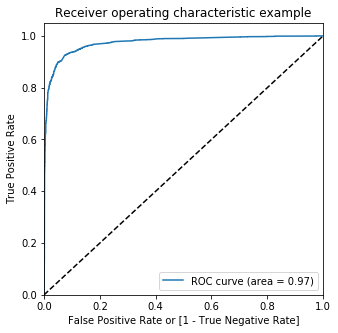

In [67]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.conv, y_train_pred_final.conv_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.conv, y_train_pred_final.conv_Prob)

### Finding Optimal Cutoff Point

In [68]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,conv,Conv_Prob,Lead_Number,predicted,conv_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.997353,7963,1,0.997386,1,1,1,1,1,1,1,1,1,1
1,0,0.036116,5521,0,0.032269,1,0,0,0,0,0,0,0,0,0
2,1,0.991521,1951,1,0.992311,1,1,1,1,1,1,1,1,1,1
3,1,0.985359,1553,1,0.986616,1,1,1,1,1,1,1,1,1,1
4,0,0.058217,9170,0,0.346808,1,1,1,1,0,0,0,0,0,0


In [69]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.conv, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.847772  0.973480  0.769192
0.2   0.2  0.903013  0.948592  0.874522
0.3   0.3  0.922159  0.930233  0.917113
0.4   0.4  0.928751  0.899225  0.947207
0.5   0.5  0.927966  0.882089  0.956644
0.6   0.6  0.922630  0.853121  0.966080
0.7   0.7  0.917922  0.822929  0.977302
0.8   0.8  0.910389  0.790698  0.985208
0.9   0.9  0.884652  0.716850  0.989543


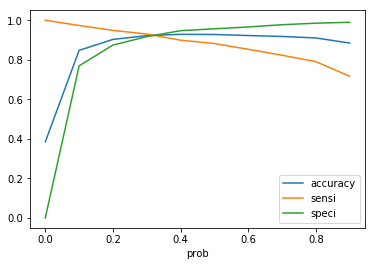

In [70]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.¶

In [71]:
y_train_pred_final['final_predicted'] = y_train_pred_final.conv_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,conv,Conv_Prob,Lead_Number,predicted,conv_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.997353,7963,1,0.997386,1,1,1,1,1,1,1,1,1,1,1
1,0,0.036116,5521,0,0.032269,1,0,0,0,0,0,0,0,0,0,0
2,1,0.991521,1951,1,0.992311,1,1,1,1,1,1,1,1,1,1,1
3,1,0.985359,1553,1,0.986616,1,1,1,1,1,1,1,1,1,1,1
4,0,0.058217,9170,0,0.346808,1,1,1,1,0,0,0,0,0,0,0


In [72]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.conv, y_train_pred_final.final_predicted)

0.9249843063402385

### Making predictions on the test set

In [73]:
X_test[['Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

In [74]:
X_test = X_test[col]
X_test.head()

,Total_Time_Spent_on_Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Last_Activity_SMS Sent,What_matters_most_to_you_in_choosing_a_course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead_Quality_Worst,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation
3497,-0.890832,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4044,-0.890832,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7200,-0.617119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1183,-0.890832,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8216,-0.826966,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
X_test_sm = sm.add_constant(X_test)

In [76]:
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3497,0.951527
4044,0.996306
7200,0.025862
1183,0.002202
8216,0.032578


In [77]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Lead_Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead_Number,0
0,1,3497,0.951527
1,1,4044,0.996306
2,0,7200,0.025862
3,0,1183,0.002202
4,0,8216,0.032578


In [78]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [79]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_Number','Converted','Conv_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_Number,Converted,Conv_Prob
0,3497,1,0.951527
1,4044,1,0.996306
2,7200,0,0.025862
3,1183,0,0.002202
4,8216,0,0.032578


In [80]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Lead_Number,Converted,Conv_Prob,final_predicted
0,3497,1,0.951527,1
1,4044,1,0.996306,1
2,7200,0,0.025862,0
3,1183,0,0.002202,0
4,8216,0,0.032578,0


## Model Evaluation

In [81]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9300622482607104

In [82]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1624,  106],
       [  85,  916]], dtype=int64)

In [83]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [84]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9150849150849151

In [85]:
# Let us calculate specificity
TN / float(TN+FP)

0.9387283236994219

In [86]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06127167630057803


In [87]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8962818003913894


#### Precision and Recall

In [99]:
from sklearn.metrics import precision_score, recall_score,precision_recall_curve

In [101]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8962818003913894

In [102]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9150849150849151